In [1]:
from sympy import symbols,exp,Derivative
import pandas as pd
import math
import random
from sklearn.metrics import mean_squared_error
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [9]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

# Page 3 simple regression model equation
#page 9 equation1 is same as page 3
# Developed a simple base model from the Incrementality bidding and Attribution.
def simple_method(inputxl):

    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    expr = alpha + beta * x + epsilon
    l = []
    for i in range(len(inputxl)):
        expr1 = expr.subs(alpha, 1).subs(beta,0.5 ).subs(x, inputxl["(Online) Sessions"][i]).subs(epsilon, 0.5)
        l.append(expr1)
    return l


129628954.95865019


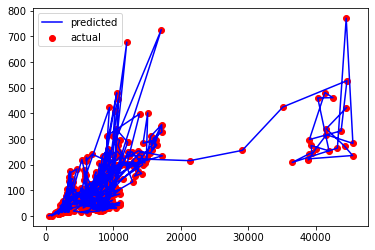

In [62]:
pred = simple_method(inputxl)
act = actual(inputxl,"(Online) Magento Orders")
print(mean_squared_error(pred, act))
plt.scatter(pred,act,color="red",label ="actual")
plt.plot(pred, act, color="blue", label="predicted")
plt.legend()
plt.show()

In [11]:

def actual(inputxl,val):
    x = symbols('x')
    a = []
    expr = x
    for i in range(len(inputxl)):
        expr1 = expr.subs(x, inputxl[val][i])
        a.append(expr1)
    return a



In [12]:
#Page 4 CPIA Cost per Incremental Action
# Compute the Conversion Profit for the IV model
def conversion_profit(input1,input2):
    Mi,Vi,Pi = symbols('Mi Vi Pi')
    Pi = Mi * Vi
    expr = Pi.subs(Mi,input1).subs(Vi,input2)
    return expr.evalf()


In [13]:
#page 5 eqn2 the sum over its characteristics’ attributed incrementality
#page 6 incremental conversion
# Compute the Incremetality conversion for the IV Model
def incrementality_conversion(inputxl,i):
    beta,Xi,delta_y = symbols('beta Xi deltay')
    sum = 0
    for j in range(18, 30):
        delta_y = beta * Xi
        expr1 = delta_y.subs(beta, inputxl.iloc[i, j]).subs(Xi, inputxl["(Online) Sessions"][i])
        sum = sum + expr1.evalf()

    return sum



In [14]:
#page 5 equation1 To accomodate heterogenous advertising, we introduce

def heterogenous_method(inputxl):
    
    l = []

    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    for i in range(len(inputxl)):
        beta = incrementality_conversion(inputxl,i)
        expr = alpha + beta + epsilon
        expr1 = expr.subs(alpha, inputxl["Offline ATV USD"][i]).subs(x, inputxl["(Online) Sessions"][i]).subs(epsilon, 0.5)
        l.append(expr1)
    return l



2.424224126704485e+18


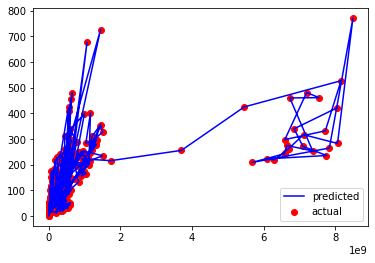

In [63]:
pred = heterogenous_method(inputxl)
act = actual(inputxl,"(Online) Magento Orders")
plt.scatter(pred,act,color="red",label ="actual")
print(mean_squared_error(pred, act))
plt.plot(pred, act, color="blue", label="predicted")
plt.legend()
plt.show()

In [16]:
#page 6 Incrementality share
# Compute the Incremetality Share for IV model
def incrementality_share(deltay,inputxl,i):
    return( deltay /(inputxl["Offline IPC"][i] + deltay))



In [17]:
#page 6 Lift per Impression
def liftper_impression(deltay,inputxl,i):
    return(deltay / (inputxl["Offline IPC"][i]))


In [18]:

#page 6 Conversion Lift
def conversion_lift(deltay,inputxl,i):
    return(deltay / (inputxl["Offline ATV USD"][i]))


In [19]:

#Page 7 equation 1 To summarise our IV model
# Compute the value of Xi through first stage scheme using IV model
def first_stage1(inputxl,i):
    pi0 = conversion_profit(inputxl,0)
    sum = pi0
    z = random.randint(0, 1)
    if (z):
        pi = conversion_profit(inputxl.iloc[i, 18], inputxl["(Online) Sessions"][i])
        sum = sum + pi
    sum = sum + inputxl["Online IPC"][i]
    return sum


In [20]:


def second_stage1(inputxl):
    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    l = []
    for i in range(len(inputxl)):
        sum = 0
        x = first_stage(inputxl,i)
        expr = beta * x
        expr1 = expr.subs(beta, inputxl.iloc[0, 18])
        sum = sum + expr1.evalf()
#         print(sum)
        exp = alpha + epsilon + sum
        expr2 = exp.subs(alpha, inputxl["Offline ATV USD"][i]).subs(epsilon, 0.5)
        l.append(expr2)
    return l



In [21]:


#Page 8 equation 1 To summarise our IV model
# Compute the value of Xi through first stage scheme using IV model
def first_stage(inputxl,i):
    pi0 = conversion_profit(inputxl,0)
    sum = pi0

    for j in range(20, 30):
        z = random.randint(0,1)
        if(z):
            pi = conversion_profit(inputxl.iloc[i, j],1)
            sum = sum + pi

    sum = sum + inputxl["Online IPC"][i]
    return sum


9112281918698.475


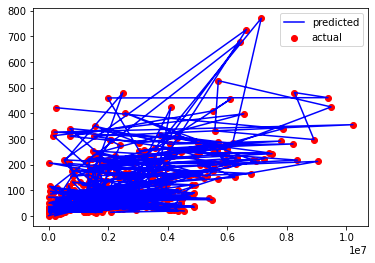

In [64]:
pred = second_stage1(inputxl)
act = actual(inputxl,"(Online) Magento Orders")
print(mean_squared_error(pred, act))
plt.scatter(pred,act,color="red",label ="actual")
plt.plot(pred, act, color="blue", label="predicted")
plt.legend()
plt.show()

In [23]:

#Page 8 equation 2 To summarise our IV model
# Developed the IV Model
def iv_model(inputxl):
    l = []
    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    for i in range(len(inputxl)):
        sum = 0
        x = first_stage(inputxl,i)
        for j in range(18, 30):
            expr = beta * x
            expr1 = expr.subs(beta, .001)
            sum = sum + expr1.evalf()
            # print(sum)
        exp = alpha + epsilon + sum
        expr2 = exp.subs(alpha, inputxl["Online IPC"][i]).subs(epsilon, 0.5)
#         print(expr2)
        l.append(expr2)
    return l


8556.129526261077


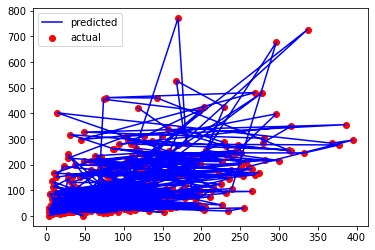

In [65]:
pred = iv_model(inputxl)
act = actual(inputxl,"(Online) Magento Orders")
print(mean_squared_error(pred, act))
plt.scatter(pred,act,color="red",label ="actual")
plt.plot(pred, act, color="blue", label="predicted")
plt.legend()
plt.show()

In [25]:

# Compute the exponential value
def exponential_form(inputxl,t):
    # print (1 /(math.tau )* (1/ math.exp(inputxl["Online IPC"][t]/math.tau)))
    return(1 / (math.tau) * (1 / math.exp(inputxl["Online IPC"][t] / math.tau)))


In [26]:

# page 11 equation 1 we can model it as a mixture of distributions.
# We rewrite xij(t) as xij(t|θ) and our mixture model as
def heter_model(inputxl):
    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    for i in range(len(inputxl)):
        beta = characteristic_effectovertime(inputxl)
        expr = alpha + beta + epsilon
        expr1 = expr.subs(alpha, inputxl["Offline ATV USD"][i]).subs(x, inputxl["(Online) Sessions"][i]).subs(epsilon,
                                                                                                              0.5)
        print(expr1.evalf())


In [27]:

# page 11 eqn2 heterogeneous treatment effects model in continuous time
def heter_model1(inputxl):
    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    val = user_adstock(inputxl)
    for i in range(len(inputxl)):
        beta = characteristic_effectovertime(inputxl)
        expr = alpha + val + beta + epsilon
        expr1 = expr.subs(alpha, inputxl["Offline ATV USD"][i]).subs(x, inputxl["(Online) Sessions"][i]).subs(epsilon,
                                                                                                              0.5)
        print(expr1.evalf())



In [28]:

# Page 12 equation 1
# tractable linear3 model of incrementality in continuous time
def combination_model1(inputxl):
    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')

    for i in range(len(inputxl)):
        x = first_stage(inputxl,i)
        li = ["(Online) Sessions","(Online) Avg Order Value USD","Offline Sales USD"]
        for k in li:
            sum = 0
            for j in range(18, 30):
                expr = beta * x
                expr1 = expr.subs(beta, inputxl.iloc[0, j])
                sum = sum + expr1.evalf()
                print(sum)
            print(sum)





In [29]:

# page 12 equation 2 we simplify notation by defining k to index all weights wijk that
# impression j takes on, including the special case of constant weighting wij = 1 ∀i, j
# Calculate the incrementality for the continous variable using IV model.
def combination_model(inputxl):
    alpha, beta, x, epsilon = symbols('alpha beta x epsilon')
    l = []

    for i in range(len(inputxl)):
        x = first_stage(inputxl,i)
        li = ["(Online) Sessions","(Online) Avg Order Value USD","Offline Sales USD"]
        expr2 = 0
        for k in li:
            sum = 0
            for j in range(18, 30):
                expr = beta * x
                expr1 = expr.subs(beta, inputxl.iloc[0, j])
                sum = sum + expr1.evalf()
#                 print(sum)
            exp = alpha + epsilon + sum
            expr2 = expr2 + exp.subs(alpha, inputxl[k][i]).subs(epsilon, 0.5)
        l.append(expr2)
    return l
#             print(expr2.evalf())





589281914865503.4


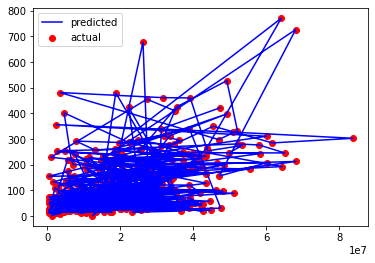

In [61]:
pred = combination_model(inputxl)
act = actual(inputxl,"(Online) Magento Orders")
print(mean_squared_error(pred, act))
plt.scatter(pred,act,color="red",label ="actual")
plt.plot(pred, act, color="blue", label="predicted")
plt.legend()
plt.show()

In [31]:
# Page 16 Imperssion Adstock
# Page 27 Imperssion Adstock
def imperssion_adstock(inputxl,t,Aj):
    return Aj * exponential_form(inputxl,t)



In [32]:
#  Page 16 Characteristic Ad Stock
# Page 27 Characteristic Ad Stock
def characteristic_adstock(inputxl,t,Aj,w):
    return(w * imperssion_adstock(inputxl,t,Aj))



In [33]:
# Page 16 User Ad Stock
# Page 27 User Ad Stock
def user_adstock(inputxl):
#     weight = [0.5,0.8,0.7,0.9,0.4]
#     t = [4,6,7,3,9,2]
#     Aj = [1,1,1,1,1]
    sum = 0
    for i in range(len(inputxl)):
        sum = sum + characteristic_adstock(inputxl,inputxl["Seasonal"][i],inputxl["(Online) Magento Orders"][i],inputxl["Orders with Coupons Online"][i])
    return(sum)



In [34]:
# Page 17 Characteristic Effect over Time
def characteristic_effectovertime(inputxl):
#     beta = [1.2,4.3,2.5,1.9,2.8]
    sum = 0
    for i in range(len(inputxl)):
        sum = sum + user_adstock(inputxl) * inputxl["(Online) Avg Order Value USD"][i]
    return sum



In [35]:
# Page 14 Campaign Incrementality
# Page 17 Ad Effect
def add_effect():
    beta = [1.2, 4.3, 2.5, 1.9, 2.8]
    k = [1,10,20,30,40]
    sum = 0
    for i in range(len(inputxl)):
        for j in range(len(k)):
            sum = sum + k[j] * inputxl["(Online) Avg Order Value USD"][i]
    return sum



In [36]:
# Page 17 Ad Effect over Time
def add_effectovertime(inputxl):
    sum = 0
    for i in range(5):
        sum = sum + characteristic_effectovertime(inputxl)
    return sum



In [37]:
# Page 17 Incremental Conversions
def incremental_conversion1():
    sum = 0
    for i in range(5):
        sum = sum + add_effect()
    return sum



In [38]:
# Page 13 impression j ’s contribution to the incrementality of a given conversion
# Each impression j ’s contribution to the incrementality of a given conversion
# Page 17 Incrementality Share
def incremental_share1(deltay,alphat):
    return (deltay / (deltay + alphat))



In [39]:
# page 15 observable p artial incrementality share
# Page 17 Partial Incrementality Share
def partial_incrementalshare(inputxl):
#     beta = [1.2, 4.3, 2.5, 1.9, 2.8]
    sum = 0
    for i in range(len(inputxl)):
        sum = sum + inputxl["(Online) Avg Order Value USD"][i] * (1 - imperssion_adstock(inputxl, 3, 1))
        return sum



In [40]:
# page 16 each impression’s incrementality share as an expected incrementality share
# Page 17 Residual Incrementality
def residual_incrementality():
#     beta = [1.2, 4.3, 2.5, 1.9, 2.8]
#     k = [1, 10, 20, 30, 40]
    sum = 0
    for i in range(len(inputxl)):
        for j in range(len(k)):
            sum = sum + k[j] * inputxl["(Online) Avg Order Value USD"][i] * (1 - imperssion_adstock(inputxl,3,1))
    return sum



In [41]:
# page 17 Expected incremental value at time t
def expected_incrementalvalue():
    return (residual_incrementality() + partial_incrementalshare())



In [42]:
# page 18 Fourier series with exponentialdistributed ad stock
def exponential_distributed(a,aj,wj):
    xinga = 1/math.tau * (1 / 1 - (1/ 1 / math.exp(1/math.tau)) *( a * math.sin(30)) - (1 - a) * math.cos(30))
    return (aj*wj*xinga)



In [43]:
# page 19 eqn 1 efficient computational methods for
# estimating the upper incomplete gamma function
def function_distribution(k):
    result = complex(math.sin(30) ,-math.cos(30)) * math.pow(complex(1,-math.tau),-k) + complex(math.sin(30) ,math.cos(30)) * math.pow(complex(1,math.tau),-k)
    return result



In [44]:
# page 19 eqn 2 efficient computational methods for
# estimating the upper incomplete gamma function
def function_distribution1(k):
    result = complex(math.cos(30) ,-math.sin(30)) * math.pow(complex(1,-math.tau),-k) + complex(math.cos(30) ,math.sin(30)) * math.pow(complex(1,math.tau),-k)
    return result



In [45]:
# page 27 potential adstock simplified
def potential_adstock_simplified(inputxl,t,tj):
    if(t > tj):
        return imperssion_adstock(inputxl,t,tj)
    else:
        return 0




In [46]:
# page 27 potential adstock
def potential_adstock(inputxl,probab,t,tj):
    if (t > tj):
        return probab * imperssion_adstock(inputxl, t, tj)
    else:
        return 0



In [47]:

# page 28 potential adstock
def charateristic_potential_adstock(inputxl,weight,t,tj):
    return weight * potential_adstock(inputxl,t,tj)




In [48]:
# page 28 user potential adstock
def user_potential_adstock(inputxl,weight,t,tj):
    sum = 0
    for i in range(len(inputxl)):
        sum = sum + characteristic_effectovertime(inputxl,inputxl["Orders with Coupons Online"][i],t,tj)
    return sum



In [49]:
# page 28 ghost bidstock simplified
# page 26 predicted win probability for each auction, Pr(bj wins) , given the
# bid we submitted bj
def ghost_bidstock_simplified(t,tj,inputxl):
    if t > tj:
        return imperssion_adstock(inputxl,t,tj)
    else:
        return 0



In [50]:
# page 28 ghost bidstock
# page 26 “ghost bid stock” are defined based on the user’s context Wi(t) ; we
# denote them by
def ghost_bidstock(inputxl,t,tj,probability):
    if t > tj:
        return probability * imperssion_adstock(inputxl,t,tj)
    else:
        return 0



In [51]:
# page 28 charateristic ghostbid
def charateristic_ghostbid(inputxl,weight,t,tj):
    return weight * ghost_bidstock_simplified(inputxl,t,tj)



In [52]:
# page 28 user ghost bid stock
def user_ghostbid_stock(inputxl,weight,t,tj):
    sum = 0
    for i in range(len(weight)):
        sum = sum + charateristic_ghostbid(inputxl,weight[i],t,tj)

    return sum


In [53]:
# Page 33 2SLS model equations
def sls_model(inputxl,Z,pi,v):
    return Z * pi + v


In [54]:
# Page 34 eqn 1
# The HCC for linear models is simply the difference in model parameters
def HCC(betahaussman,betacorrelation):
    return betahaussman - betacorrelation


In [55]:

# page 34 eqn 2
# Estimate the causal model (e.g., GMM objective function) using Hausman penalization
def hausman_penalization(inputxl,betah,betac,lam):
    val = HCC(betah,betac)
    val = abs(val *val)
    return lam * val


In [56]:

# page 35 Crossvalidate
# λHCC using the GMM objective function
def cross_validate(y,x,betahcc):
    deltay,deltax = symbols('deltay deltax')
    expr = deltay
    expr_diff = Derivative(expr, deltax)
    expr2 = expr_diff.subs(deltay,y)
    return expr_diff + betahcc



8873.878752033499


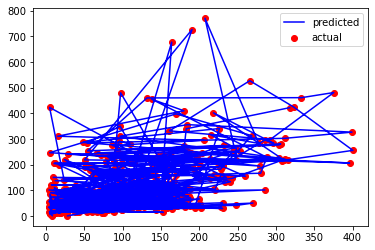

In [66]:


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    excel_file = 'input.xlsx'
    inputxl = pd.read_excel(excel_file, sheet_name='ClothRetailerXYZ', index_col=0)
    # print("Choose the model number:")
    # print("1: Simple Model")
    # print("2: Two Stage Model")
    # print("3: Continous Model")
    # x = int(input())
    # if(x == 1):
    #     simple_method(inputxl)
    # elif(x == 2):
    #     second_stage(inputxl)
    # elif(x == 3):
    #     combination_model(inputxl)
    # else:
    #     print("Invalid Input")
    # heterogenous_method(inputxl)
    # second_stage1(inputxl)
    # exponential_form(inputxl, 1)
    # print(imperssion_adstock(inputxl, 3, 1))
    # print(characteristic_adstock(inputxl,3,1,0.8))
    # print(user_adstock(inputxl))
    # heter_model(inputxl)
    # print(exponential_distributed(1,2,3))

    # Evaluation metric for the simple method RMSE
    # pred = simple_method(inputxl)
    # act = actual(inputxl,"(Online) Sessions")
    # print(mean_squared_error(pred, act))

    # Evaluation metric for the simple method RMSE
    pred = iv_model(inputxl)
    act = actual(inputxl,"(Online) Magento Orders")
    print(mean_squared_error(pred, act))
    plt.scatter(pred,act,color="red",label ="actual")
    plt.plot(pred, act, color="blue", label="predicted")
    plt.legend()
    plt.show()

    # print(movies.head())
    # simple_method(movies)
    # first_stage(inputxl,0)
    # second_stage(inputxl)
    # exponential_form(inputxl)
    # combination_model(inputxl)
    # print(conversion_profit(inputxl,1))
    # print(incrementality_conversion(inputxl,1))
    # deltay = incrementality_conversion(inputxl,1)
    # print(incrementality_share(deltay,inputxl,1))


# See PyCharm help at https://www.jetbrains.com/help/pycharm/
